# AMAZON DATA CURATION 

In this project, data was curated from the amazon website to check the list of best sellers from 2009.

Over the years, amazon has been the world store where one can easily order a product and get it delivered. The delivery time has reduced because there are more amazom warehouses and more efforts in logistics and planning.

This data was curated and analysed to see hidden information in the data. 

Data curation involves the organising and storage of data so that it can be used anytime in the future. Data has to be curated properly in order to avoid errors 

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests

The Beautiful Soup library was used to scrap the data from the amazon website

In [2]:
no_pages = 75

def get_data(pageNo):  
    headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}
    r = requests.get('https://www.amazon.com/gp/bestsellers/books/ref=zg_bs_pg_'+str(pageNo)+'?ie=UTF8&pg='+str(pageNo), headers=headers)#, proxies=proxies)
    content = r.content
    soup = BeautifulSoup(content)
    
    alls = []
    for d in soup.findAll('div', attrs={'class' : 'a-cardui _p13n-zg-list-grid-desktop_style_grid-cell__1uMOS p13n-grid-content'}):
        name = d.find('div', attrs={'class':'_p13n-zg-list-grid-desktop_truncationStyles_p13n-sc-css-line-clamp-1__1Fn1y'})
        author = d.find('a', attrs={'class':'a-size-small a-link-child'})
        rating = d.find('span', attrs={'class':'a-icon-alt'})
        users_rated = d.find('span', attrs={'class':'a-size-small'})
        price = d.find('span', attrs={'class':'_p13n-zg-list-grid-desktop_price_p13n-sc-price__3mJ9Z'})

        all1=[]

        if name is not None:
            all1.append(name.text)
        else:
            all1.append("unknown-product")
            
        if author is not None:
            #print(author.text)
            all1.append(author.text)
        elif author is None:
            author = d.find('span', attrs={'class':'a-size-small a-color-base'})
            if author is not None:
                all1.append(author.text)
            else:    
                all1.append('0')

        if rating is not None:
            #print(rating.text)
            all1.append(rating.text)
        else:
            all1.append('-1')
            

        if price is not None:
            #print(price.text)
            all1.append(price.text)
        else:
            all1.append('0')
            
    
        alls.append(all1)    
    return alls

In [3]:
results = []
for i in range(1, no_pages):
    results.append(get_data(i))
flatten = lambda l: [item for sublist in l for item in sublist]
df = pd.DataFrame(flatten(results),columns=['Book Name','Author','Rating', 'Price'])
df.to_csv('amazon_products.csv', index=False, encoding='utf-8')

In [4]:
df1 = pd.read_csv("amazon_products.csv")

In [5]:
df1

,Book Name,Author,Rating,Price
0,How to Catch the Easter Bunny,Adam Wallace,4.8 out of 5 stars,$7.34
1,It's Not Easy Being a Bunny (Beginner Books(R)),Marilyn Sadler,4.8 out of 5 stars,$5.98
2,Half Baked Harvest Every Day: Recipes for Bala...,Tieghan Gerard,4.6 out of 5 stars,$19.48
3,Recessional: The Death of Free Speech and the ...,David Mamet,5.0 out of 5 stars,$28.99
4,Atomic Habits: An Easy & Proven Way to Build G...,James Clear,4.8 out of 5 stars,$11.98
...,...,...,...,...
235,200 Must Know Sight Words Activity Workbook: L...,Smart Kids Notebooks,4.7 out of 5 stars,$5.99
236,Embrace Your Almost: Find Clarity and Contentm...,Jordan Lee Dooley,5.0 out of 5 stars,$19.99
237,Jesus Loves Me 5-Button Songbook - Perfect Gif...,Ginger Swift,4.8 out of 5 stars,$12.99
238,"Salt, Fat, Acid, Heat: Mastering the Elements ...",Samin Nosrat,4.8 out of 5 stars,$16.65


In [6]:
df['Rating'] = df['Rating'].apply(lambda x: x.split()[0]).astype(float)

In [7]:
df.dtypes

Book Name     object
Author        object
Rating       float64
Price         object
dtype: object

In [8]:
df["Price"] = df["Price"].str.replace('$','').astype(float)

D:\anacon\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [9]:
df.isnull().sum()

Book Name    0
Author       0
Rating       0
Price        0
dtype: int64

In [10]:
df.head()

,Book Name,Author,Rating,Price
0,How to Catch the Easter Bunny,Adam Wallace,4.8,7.34
1,It's Not Easy Being a Bunny (Beginner Books(R)),Marilyn Sadler,4.8,5.98
2,Half Baked Harvest Every Day: Recipes for Bala...,Tieghan Gerard,4.6,19.48
3,Recessional: The Death of Free Speech and the ...,David Mamet,5.0,28.99
4,Atomic Habits: An Easy & Proven Way to Build G...,James Clear,4.8,11.98


In [11]:
df.duplicated().any()

False

In [12]:
df.dtypes

Book Name     object
Author        object
Rating       float64
Price        float64
dtype: object

In [13]:
df.shape

(240, 4)

In [14]:
df.describe()

,Rating,Price
count,240.000000,240.000000
mean,4.364167,11.903333
std,1.399749,6.894301
min,-1.000000,0.000000
25%,4.600000,6.990000
50%,4.800000,10.370000
75%,4.800000,16.215000
max,5.000000,43.990000


Using the describe function, we can see that there are wrong data in the dataset. For example, we can't have a price of $0 and we can't have a rating of -1 too. Therefore, there is a need to drop rows that have these values in them

In [15]:
df = df[df['Price'] != 0]
df = df[df['Rating'] != -1]

In [16]:
df.describe()

,Rating,Price
count,219.000000,219.000000
mean,4.720548,11.768950
std,0.189852,6.197465
min,3.900000,2.880000
25%,4.700000,6.990000
50%,4.800000,10.350000
75%,4.800000,16.095000
max,5.000000,35.470000


Now, our dataset makes more sense

Let us look at the histogram of our numeric columns

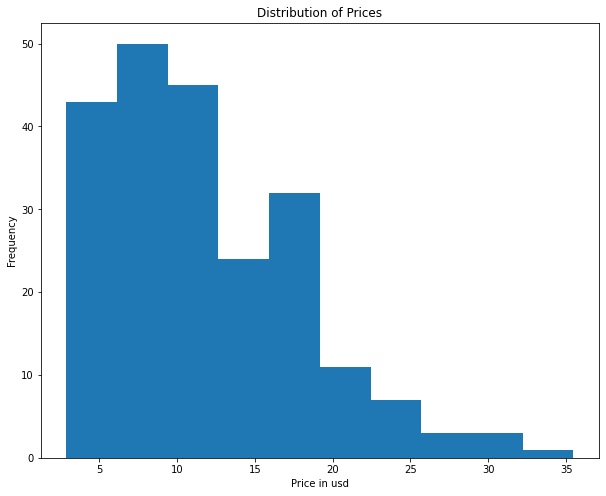

In [18]:
plt.figure(figsize = (10,8))
plt.hist(df['Price'])
plt.xlabel('Price in usd')
plt.ylabel('Frequency')
plt.title('Distribution of Prices');

From the figure above, i can deduce that most prices were within the range of 6 - 12 usd

Smaller prices tend to have more frequency than products with high prices.

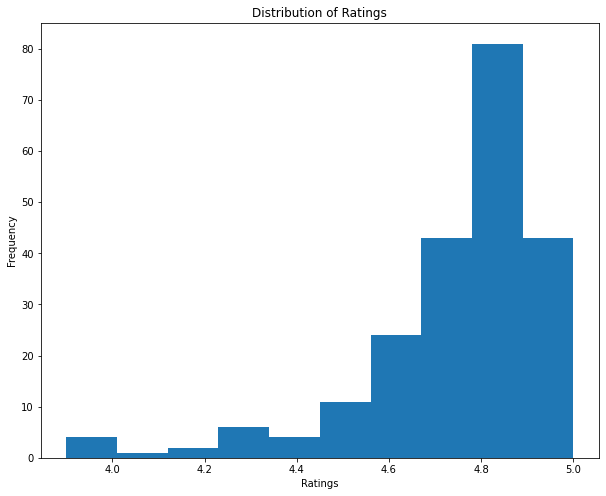

In [19]:
plt.figure(figsize = (10,8))
plt.hist(df['Rating'])
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings');

Looking at the histogram plot of the ratings column, it is observed that most best seller books had ratings between 4.7 to 4.9

In [20]:
df[df['Price'] == df['Price'].min()]

# Which product had the least price?

,Book Name,Author,Rating,Price
51,Flash Cards: Sight Words,Scholastic Teacher Resources,4.8,2.88


In [21]:
df[df['Price'] == df['Price'].max()]

# Which product had the highest price?

,Book Name,Author,Rating,Price
215,System Design Interview – An Insider's Guide: ...,Alex Xu,4.7,35.47


In [22]:
multiple = pd.DataFrame(df['Author'].value_counts())
multiple[multiple['Author'] >1]

#Are there best sellers that appeared on the list more than once?

,Author
Colleen Hoover,6
Julia Quinn,6
Alice Schertle,3
Sharon Jones,3
Brené Brown,3
Sarah J. Maas,3
Dav Pilkey,3
Tui T. Sutherland,2
Workman Publishing,2
Tieghan Gerard,2


Some sellers appeared on the best seller list more than once and they are shown in the dataframe above

In [23]:
df.groupby('Rating')['Author'].count()

Rating
3.9     2
4.0     2
4.1     1
4.2     2
4.3     6
4.4     4
4.5    11
4.6    24
4.7    43
4.8    81
4.9    37
5.0     6
Name: Author, dtype: int64

This confirms our claim from the histogram of ratings that the highest ratings range from 4.7 to 4.9